<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Optimizing_The_model_Parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn 
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
train_dataset  = datasets.FashionMNIST(
    root = "data",
    download = True, 
    train = True,
    transform =  ToTensor(),
    target_transform= Lambda(lambda y:torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y),value=1))
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
test_dataset = datasets.FashionMNIST(
    root = "data",
    download = True, 
    train = False,
    transform = ToTensor(),
    target_transform= Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [ ]:
#Load using the dataloader 
train_loader = DataLoader(train_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size =  64)

In [ ]:
#Build the computational graph 
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.layers_relu_stack = nn.Sequential(
        nn.Linear(28 * 28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )
  def forward(self,x):
    x = self.flatten(x)
    logits = self.layers_relu_stack(x)
    return logits

In [ ]:
model = NeuralNetwork().to(device)

Hyperparameters are parameters that let you control the model optimization process. Different hyperparameter values can impact the model training and convergence rate.

These are the hyperparamter values we'll use:

*number_of_epochs*: These are the number of iteration steps we'll take over the dataset.

*batch_size*: These are the number of batch samples that we'll pass through the nextwork before the parameters are updated.

*learning_rate*: This is how to update each parameter after each epoch/batch smaller values will make training take a longer time while larger values may yield unpredictable behaviour during training.


In [ ]:
#Initialize the hyperparameters
learning_rate = 1e-3
batch_size = 64
epochs = 10

#Initialize the loss function that will compute the distance between our model's predictions and the true values
loss_fn = nn.CrossEntropyLoss() #Combination of softmax and negative Log Likelihood 

#Initialize the optimizer that will optimize the parmaters of our model the optimization alogorithm finds the most optimal values for our parameters that redice loss function per epoch
#We initiliase the optimizer and pass in the parameters we want to optimize together with the learning rate 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

optimizer.zero_grad() is used to reset the parameters of the model 
to backpropragate through our network we call the loss.backward():
Pytorch deposits the gradient of the loss with respect to each parameter. 
Once we have the gradients we call the optimizer.step() to adjust eacch parameter based on the gradients collected. 

In [ ]:
def train_loop(dataloader,model, loss_fn, optimizer):
  size = len(dataloader.dataset) 
  for batch,  (x,y) in enumerate(dataloader):
    pred = model(x)
    loss = loss_fn(pred,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss , current = loss.item(), batch * len(x)
      print(f"loss:{loss:>7f} [{current:>5d}/{size:>5d}]")

In [ ]:
def test_loop(dataloader,model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss,correct = 0,0 

  with torch.no_grad():
    for x,y in dataloader:
      pred = model(x)
      test_loss += loss_fn(pred,y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
      test_loss /= num_batches
      correct /= size 
      print(f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss:{test_loss:>8f}\n")

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
epochs  = 50 
for t in range(epochs):
  print(f"Epoch{t + 1}\n--------------------------")
  train_loop(train_loader, model, loss_fn,optimizer)
  #test_loop(test_loader, model, loss_fn)
  print("Done!")

In [8]:
import torch
from torch import nn
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [13]:
train_data = datasets.FashionMNIST(
    root = "data",
    download =True,
    train = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y:torch.zeros(10,dtype =torch.float).scatter_(0,torch.tensor(y),value=1))
)

In [17]:
test_data = datasets.FashionMNIST(
    root = "data",
    download = True,
    train = False, 
    transform = ToTensor(),
    target_transform = Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(y),value=1))
)

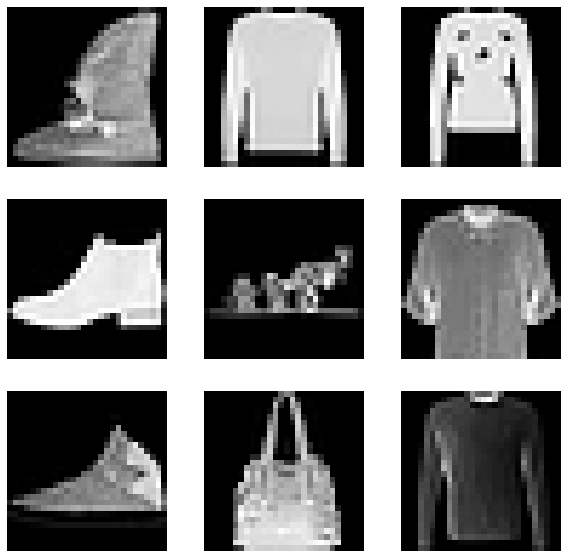

In [24]:
#Visualize the dataset before 
figure = plt.figure(figsize=(10,10))
cols,rows = 3,3 
for i  in range(1,rows * cols + 1):
  simple_idx = torch.randint(len(train_data), size = (1,)).item()
  image,labels = train_data[simple_idx]
  figure.add_subplot(rows,cols,i)
  plt.axis('off')
  plt.imshow(image.squeeze(),cmap="gray")

In [35]:
#Build the computational graph
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()
    self.layers_stack_relu = nn.Sequential(
        nn.Linear(28 * 28, 512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
        )
  def forward(self,x):
    x = self.flatten(x)
    logits = self.layers_stack_relu(x)
    return logits

In [37]:
model = NeuralNetwork().to(device) #Create an instance of our model and pass it to the device

In [40]:
#Define the hyperparameters 
epochs = 10
learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss()
batch_size = 64 
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [53]:
#Define the training loop 
def train_loop(dataloader,model,loss_fn,optimizer):
  size = len(dataloader.dataset)  
  for batch,(X,y) in enumerate(dataloader):
    pred = model(X)
    loss = loss_fn(pred,y)

    optimizer.zero_grad()
    loss.Backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(),batch * len(X)
      print(f'loss: {loss:>7f},[{current:>5d}/{size:>5d}]')

In [ ]:
#test_loop
